<a href="https://colab.research.google.com/github/aakashk243/Machine_Learning_Lab/blob/main/TaxiFarePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import all the required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load a sample of the dataset to keep memory manageable
df = pd.read_csv('/content/Taxi_Trips_-_2024_20240408.csv', nrows=100000)

In [14]:
#check for null values
df.isnull().sum()

,0
Trip ID,0
Taxi ID,0
Trip Start Timestamp,0
Trip End Timestamp,1
Trip Seconds,10
Trip Miles,0
Pickup Census Tract,60816
Dropoff Census Tract,62413
Pickup Community Area,2825
Dropoff Community Area,9849


In [15]:
# Drop rows with missing fare values or irrelevant data
df = df.dropna(subset=['Trip Total', 'Trip Miles', 'Trip Seconds'])

# Keep only relevant columns for fare prediction
df = df[['Trip Total', 'Trip Miles', 'Trip Seconds']]

# Rename columns for ease
df.columns = ['fare', 'miles', 'seconds']

# Features and target
X = df[['miles', 'seconds']]
y = df['fare']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)

Coefficients: [2.46412667e+00 1.16498931e-03]
Intercept: 9.734702989912826
Mean Squared Error: 209.00727356753927


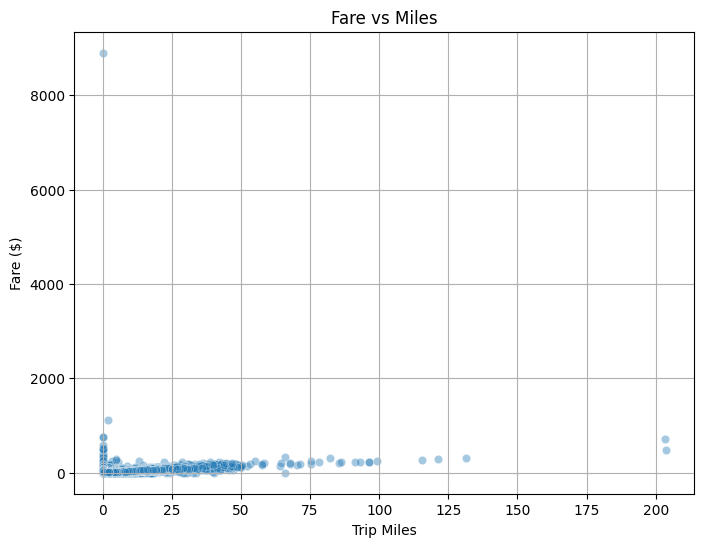

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['miles'], y=df['fare'], alpha=0.4)
plt.xlabel("Trip Miles")
plt.ylabel("Fare ($)")
plt.title("Fare vs Miles")
plt.grid(True)
plt.show()

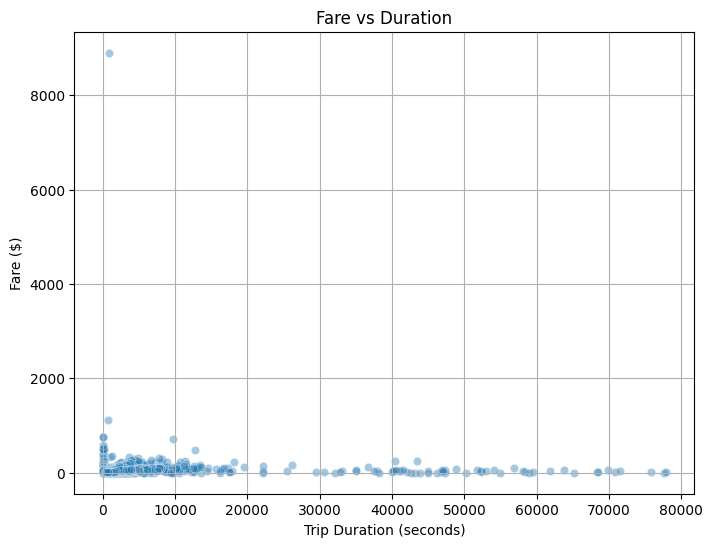

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['seconds'], y=df['fare'], alpha=0.4)
plt.xlabel("Trip Duration (seconds)")
plt.ylabel("Fare ($)")
plt.title("Fare vs Duration")
plt.grid(True)
plt.show()

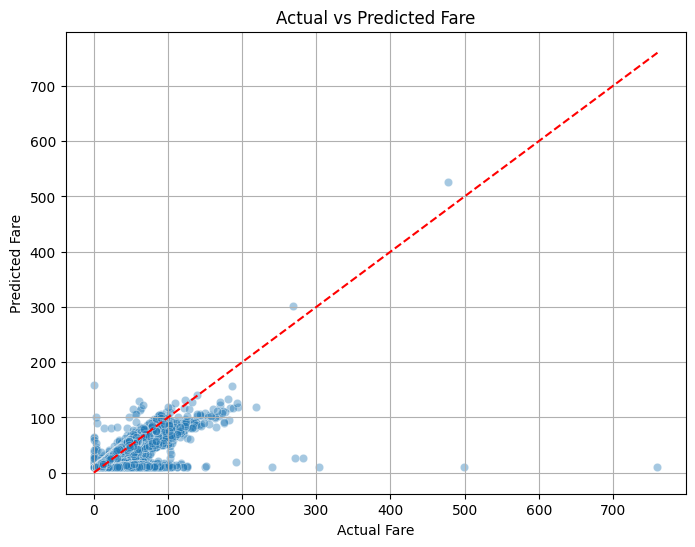

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Actual vs Predicted Fare')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.grid(True)
plt.show()